In [ ]:
!pip install watermark

In [2]:
%load_ext watermark

In [3]:
%watermark -a "Rishit Kapoor 21BAI1046" -u -d -v -m

Author: Rishit Kapoor 21BAI1046

Last updated: 2024-03-26

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.58+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit



11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
469/469 [==============================] - 17s 24ms/step - loss: 0.0728 - val_loss: 0.0601
Epoch 2/50
469/469 [==============================] - 10s 22ms/step - loss: 0.0598 - val_loss: 0.0591
Epoch 3/50
469/469 [==============================] - 10s 22ms/step - loss: 0.0593 - val_loss: 0.0588
Epoch 4/50
469/469 [==============================] - 10s 22ms/step - loss: 0.0590 - val_loss: 0.0590
Epoch 5/50
469/469 [==============================] - 10s 22ms/step - loss: 0.0588 - val_loss: 0.0584
Epoch 6/50
469/469 [==============================] - 10s 22ms/step - loss: 0.0587 - val_loss: 0.0584
Epoch 7/50
469/469 [==============================] - 11s 23ms/step - loss: 0.0587 - val_loss: 0.0584
Epoch 8/50
469/469 [==============================] - 11s 23ms/step - loss: 0.0586 - val_loss: 0.0583
Epoch 9/50
469/469 [==============================] - 11s 23ms/step - loss: 0.0586 - val_loss: 0.0583
Epoch 10/50
469/4

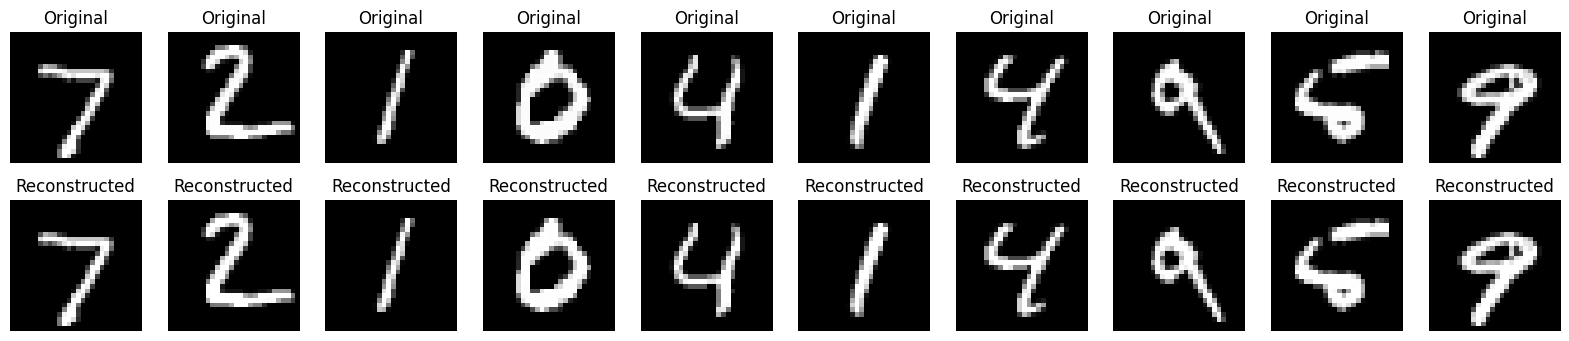

In [4]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense, Reshape, Conv2D, Flatten, Conv2DTranspose

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and reshape the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Define the encoder architecture
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x)

# Define the decoder architecture
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Create autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode images
decoded_imgs = autoencoder.predict(x_test)

# Plot the results
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.show()
